## Retail Data Analysis

This project is a comprehensive Retail Data Analysis focusing on key areas of customer behavior, sales performance, and personalized engagement strategies. The goal is to transform raw retail transaction data into actionable business intelligence.

The project is structured into three main phases: Data Preparation, Core Analytical Modeling, and Insight Generation & Recommendation.

In [14]:
# Importing all the libraries which we are using to perfom all tasks.

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

##### Exploring the Dataset
Before starting working on project I should

- Load and explore the data,
- Check for missing values, incorrect types, and inconsistencies,
- Understand the columns in the data.

In [18]:
df = pd.read_csv("new_retail_data.csv")

In [20]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [22]:
df.tail()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
302009,2882826.0,53626.0,Dustin Merritt,William14@gmail.com,9.518927e+09,143 Amanda Crescent,Tucson,West Virginia,25242.0,USA,...,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks


In [24]:
df.shape

(302010, 30)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [28]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [30]:
# Missing Values
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [32]:
# Duplicate values
df.duplicated().sum()

4

In [34]:
df.drop_duplicates(inplace = True )

#### Data Cleanings and manipulatation

In [37]:
# Dropping columns which are not necessary for analysis.
df = df.drop([ "Name" , "Email" , "Phone" , "Address", "Zipcode", "products"], axis=1 )

# Dropping null values from those column which are useful in further analysis.
df.dropna(subset= ["Transaction_ID" ,"Customer_ID", 'Feedback', 'Ratings'], inplace=True)

In [39]:
# Converting to datetime object.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [41]:
#Checking all unique city by country
df.groupby('Country')['City'].unique()

Country
Australia    [Geelong, Brisbane, Wollongong, Cairns, Mackay...
Canada       [Edmonton, Kitchener, Hamilton, Halifax, Montr...
Germany      [Dortmund, Munich, Cologne, Leipzig, Bielefeld...
UK           [Nottingham, Bristol, Portsmouth, Manchester, ...
USA          [San Jose, Cleveland, Philadelphia, Atlanta, N...
Name: City, dtype: object

In [43]:
# For City: Missing values were filled with the most frequent city in the dataset grouped by country.
# For State: Missing values were filled with the state name which maps to their city.
# For Country: Missing values were filled with the Country name which maps to their state name.

df["City"] = df["City"].fillna( df.groupby("Country")["City"].transform( lambda x: x.mode().iloc[0] ))        

city_state_map = df.dropna(subset=['State']).set_index('City')['State'].to_dict()
df['State'] = df['State'].fillna(df['City'].map(city_state_map))

country_state_map = df.dropna( subset =["Country"] ).set_index("State")["Country"].to_dict()
df["Country"] = df["Country"].fillna(df["State"].map(country_state_map))

In [106]:
df["Gender"].value_counts()

Gender
Male      187916
Female    114094
Name: count, dtype: int64

In [108]:
df["Customer_Segment"].value_counts()

Customer_Segment
Regular    146221
New         91187
Premium     64387
Name: count, dtype: int64

In [110]:
df["Income"].value_counts()

Income
Medium    130230
Low        96261
High       75229
Name: count, dtype: int64

In [45]:
df["Age"].fillna(df["Age"].median(), inplace = True )
df["Gender"].fillna( "Male", inplace = True)
df["Income"].fillna( "Medium" , inplace = True )
df["Customer_Segment"].fillna( "Regular", inplace = True)

In [47]:
df['Year'] = df['Year'].astype(str)

In [49]:
df['Year'].fillna( df['Date'].dt.year, inplace = True )
df['Month'].fillna( df['Date'].dt.month_name(), inplace = True )
df["Date"].fillna( df['Year'] + '-' + df['Month'] + '-01' , inplace = True)
df['Time'].fillna(method='ffill', inplace=True)

In [51]:
df["Total_Purchases"].fillna( round(df["Total_Amount"]/df["Amount"], 0), inplace = True  )
df["Amount"].fillna( df["Total_Amount"]/df["Total_Purchases"] , inplace= True)
df["Total_Amount"].fillna(df["Total_Purchases"]*df["Amount"], inplace = True)

In [53]:
df['Shipping_Method'].fillna('Unknown', inplace = True )
df['Payment_Method'].fillna('Unknown', inplace = True )
df['Order_Status'].fillna('Unknown', inplace = True )

In [135]:
df.groupby("Product_Category")['Product_Type'].unique()

Product_Category
Books          [Children's, Non-Fiction, Literature, Thriller...
Clothing       [Shorts, Shirt, T-shirt, Shoes, Dress, Jacket,...
Electronics    [Tablet, Television, Smartphone, Laptop, Headp...
Grocery        [Chocolate, Water, Snacks, Juice, Coffee, Soft...
Home Decor     [Tools, Decorations, Furniture, Bathroom, Kitc...
Name: Product_Type, dtype: object

In [11]:
df.groupby("Product_Brand")['Product_Type'].unique()

Product_Brand
Adidas                           [T-shirt, Shoes, Jacket]
Apple                        [Tablet, Laptop, Smartphone]
Bed Bath & Beyond            [Bathroom, Kitchen, Bedding]
BlueStar                                    [BlueStar AC]
Coca-Cola                      [Water, Juice, Soft Drink]
HarperCollins            [Non-Fiction, Thriller, Fiction]
Home Depot                [Tools, Decorations, Furniture]
IKEA                   [Furniture, Decorations, Lighting]
Mitsubhisi           [Mitsubishi 1.5 Ton 3 Star Split AC]
Nestle                        [Chocolate, Snacks, Coffee]
Nike                             [Shorts, Shoes, T-shirt]
Penguin Books          [Children's, Non-Fiction, Fiction]
Pepsi                          [Water, Soft Drink, Juice]
Random House           [Non-Fiction, Literature, Fiction]
Samsung                  [Tablet, Television, Smartphone]
Sony                 [Headphones, Smartphone, Television]
Whirepool                                        [Fridge]


In [55]:
'''To fill the missing values of product category and brand i mapped the product type with product category and brand
then created a dictionary cat_type_mapping and brand_type_mapping which fill in the Product Category and Brand.   '''

cat_type_mapping = df.dropna(subset=['Product_Category']).set_index("Product_Type")["Product_Category"].to_dict()
df['Product_Category'].fillna(df['Product_Type'].map(cat_type_mapping), inplace = True)

brand_type_mapping = df.dropna(subset=['Product_Brand']).set_index('Product_Type')['Product_Brand'].to_dict()
df['Product_Brand'].fillna(df['Product_Type'].map(brand_type_mapping), inplace = True)

In [57]:
# Again checking for null values in each columns 
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
City                0
State               0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                1
Year                0
Month               1
Time                0
Total_Purchases     0
Amount              1
Total_Amount        1
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
dtype: int64

Now data is clean for analysis.

#### RFM Calculation
To segment the customer base based on their historical purchasing behavior to prioritize marketing efforts.

Methodology: The Recency, Frequency, and Monetary (RFM) model is applied.
- Recency: How recently a customer made a purchase.
- Frequency: How often a customer makes a purchase.
- Monetary: How much money a customer spends.

In [59]:
# Latest transaction date in dataset
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
reference_date = df['Date'].max()

# RFM Calculations
rfm = df.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',                          # Frequency
    'Amount': 'sum'                                     # Monetary
}).reset_index()

rfm

,Customer_ID,Date,Transaction_ID,Amount
0,10000.0,102.0,4,940.297743
1,10001.0,104.0,5,1517.921543
2,10002.0,94.0,5,1117.164676
3,10003.0,227.0,2,266.301835
4,10004.0,30.0,2,460.702696
...,...,...,...,...
86738,99995.0,97.0,8,1507.445075
86739,99996.0,63.0,4,1015.695955
86740,99997.0,51.0,4,1020.099125
86741,99998.0,4.0,5,1299.841122


In [61]:
rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,10000.0,102.0,4,940.297743
1,10001.0,104.0,5,1517.921543
2,10002.0,94.0,5,1117.164676
3,10003.0,227.0,2,266.301835
4,10004.0,30.0,2,460.702696


In [63]:
# RFM Scoring (1 = worst, 5 = best)
rfm.dropna(subset=['Recency'], inplace=True)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm['RFM_Score']

0         8
1        11
2        11
3         3
4         7
         ..
86738    12
86739    11
86740    12
86741    14
86742     7
Name: RFM_Score, Length: 86730, dtype: int32

In [65]:
rfm.describe()

,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,86730.000000,86730.000000,86730.000000,86730.000000,86730.000000,86730.000000,86730.000000,86730.000000
mean,55007.763219,96.122760,3.472478,886.043269,3.011864,3.000000,3.000000,9.011864
std,25985.681154,83.621718,1.759899,519.608941,1.417857,1.414222,1.414222,3.478277
min,10000.000000,0.000000,1.000000,10.006931,1.000000,1.000000,1.000000,3.000000
25%,32503.250000,30.000000,2.000000,487.575644,2.000000,2.000000,2.000000,6.000000
50%,55018.500000,72.000000,3.000000,814.875983,3.000000,3.000000,3.000000,9.000000
75%,77513.750000,142.000000,5.000000,1200.892186,4.000000,4.000000,4.000000,12.000000
max,99999.000000,365.000000,13.000000,4588.737152,5.000000,5.000000,5.000000,15.000000


In [67]:
# Customers are classified into strategic segments such as Best Customers, Loyal Customers, Potential Loyalists, and At Risk based on their score.

def segment(rfm):
    if rfm['RFM_Score'] >= 12:
        return 'Best Customers'
    elif rfm['RFM_Score'] >= 9:
        return 'Loyal Customers'
    elif rfm['RFM_Score'] >= 6:
        return 'Potential Loyalist'
    else:
        return 'At Risk'

rfm['RFM_Segment'] = rfm.apply(segment, axis=1)


Insights:

Customers were classified into four key groups based on their RFM Score:

Best Customers (RFM Score $ > 12$), 
Loyal Customers (RFM Score $ >  9$),
Potential Loyalist (RFM Score $ > 6$),
At Risk (RFM Score $< 6$)

The segmentation provides a clear view of the most valuable customers who should be prioritized for retention efforts (Best Customers) and those needing win-back strategies (At Risk).


## EDA

#### 	Customer segmentation analysis based on demographics, purchase behavior, and feedback. 

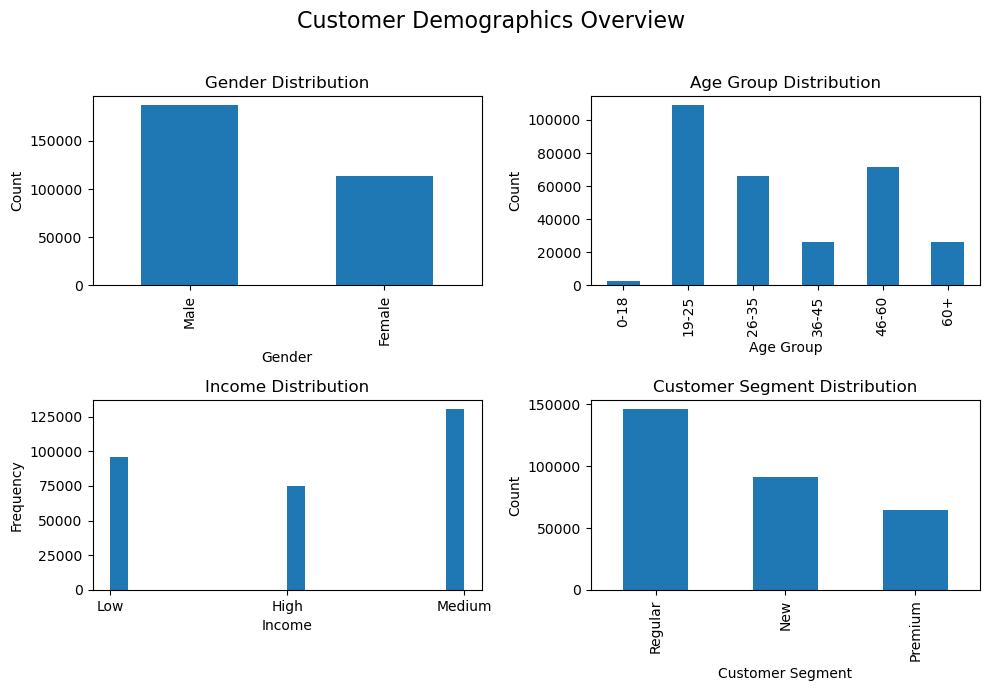

In [69]:

#        Age Group 
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

#         Subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle("Customer Demographics Overview \n", fontsize=16)

# 1️ Gender Distribution
df['Gender'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title("Gender Distribution")
axes[0,0].set_xlabel("Gender")
axes[0,0].set_ylabel("Count")

# 2️ Age Group Distribution
df['Age_Group'].value_counts().sort_index().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title("Age Group Distribution")
axes[0,1].set_xlabel("Age Group")
axes[0,1].set_ylabel("Count")

# 3️ Income Distribution
axes[1,0].hist(df['Income'], bins=20)
axes[1,0].set_title("Income Distribution")
axes[1,0].set_xlabel("Income")
axes[1,0].set_ylabel("Frequency")

# 4️ Customer Segments
df['Customer_Segment'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title("Customer Segment Distribution")
axes[1,1].set_xlabel("Customer Segment")
axes[1,1].set_ylabel("Count")

plt.tight_layout()  # To adjust space
plt.show()


#### Customer Demographics Insights
1. Gender Distribution
Key Observation
- The customer base is male-dominated, significantly higher than females.
2. Age Group Distribution
Key Observations
- 19–25 age group is the highest — indicating the dominant audience is young adults.
- 26–35 and 46–60 are also strong groups.
3. Income Distribution
Key Observations
- Medium-income customers form the largest segment. Low-income customers are a strong second.
- High-income customers are the smallest group.
4. Customer Segment Distribution
Key Observations
- Regular customers are the largest segment → strong repeat behavior.
- New customers are moderate → acquisition is happening steadily.
- Premium customers are the smallest → potential to build loyalty programs or premium services.



#### Payment,Shipping and customer feedback Overview

Text(0, 0.5, 'Order Count')

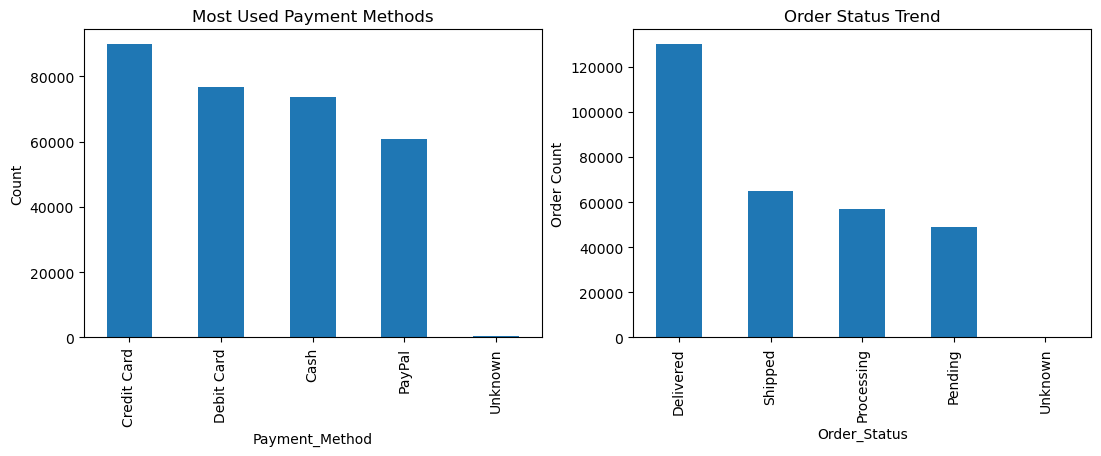

In [71]:
fig, axes = plt.subplots(1,2, figsize=(13,4))

# Most used payment method
payment_method = df['Payment_Method'].value_counts()
# Order Status Trend
order_status_counts = df['Order_Status'].value_counts()

payment_method.plot(kind='bar', ax=axes[0])
axes[0].set_title("Most Used Payment Methods")
axes[0].set_ylabel("Count")

order_status_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title("Order Status Trend")
axes[1].set_ylabel("Order Count")

Text(0, 0.5, 'Order Count')

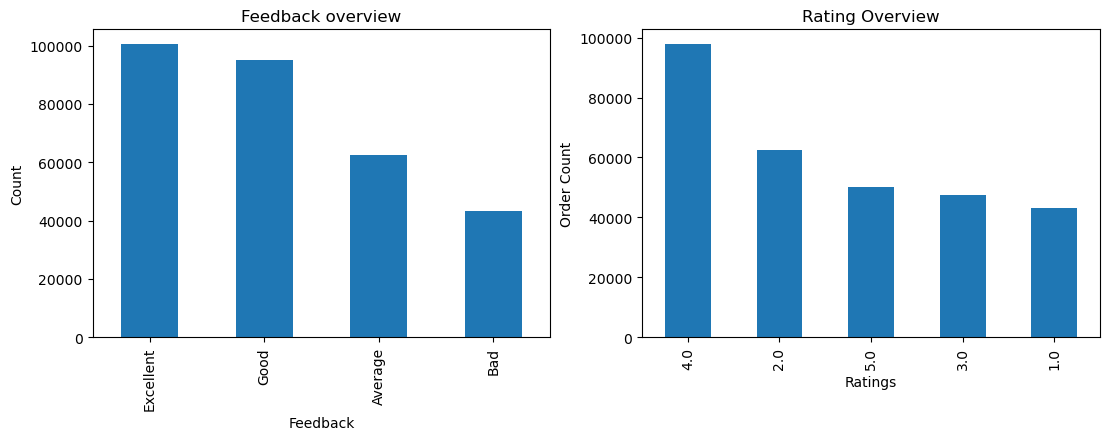

In [73]:
fig, axes = plt.subplots(1,2, figsize=(13,4))

# Most used payment method
feedback = df['Feedback'].value_counts()
#Order Status Trend
rating = df['Ratings'].value_counts()

feedback.plot(kind='bar', ax=axes[0])
axes[0].set_title("Feedback overview")
axes[0].set_ylabel("Count")

rating.plot(kind='bar', ax=axes[1])
axes[1].set_title("Rating Overview")
axes[1].set_ylabel("Order Count")

#### Key Observation
1. Most Used Payment Methods
- Credit Card is the most preferred payment method and  PayPal is the least used payment method.
- Debit Card and Cash have almost similar usage — indicating mixed customer preferences.
  
2. Order Status Trend
- Delivered orders are the highest, showing strong fulfillment efficiency.
- Shipped and Processing orders are moderate, indicating ongoing workflow.
- Pending orders are the lowest, but still significant — may signal delays or customer verification issues.

3. Feedback Overview

- Excellent and Good feedback dominate → customers are largely satisfied.
- Average feedback is moderate, showing some improvement areas. Bad feedback is lowest, meaning very few customers are unhappy.

4. Rating Overview

- Most orders have a 4-star rating, showing high satisfaction.
- 2-star ratings are the second highest → indicates a noticeable group with issues.
- 1-star, 3-star, and 5-star ratings are balanced but lower.



#### Sales Trends Overview

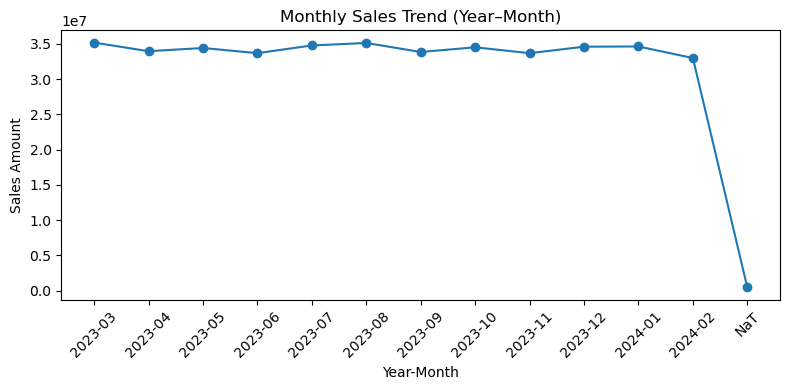

In [75]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('YearMonth')['Total_Amount'].sum()

plt.figure(figsize=(8,4))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend (Year–Month)")
plt.xlabel("Year-Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Sales trend insights

Sales remain stable and strong between March 2023 and January 2024.


#### Product Performance Overview

Revenue by Category Data:
 Product_Category
Electronics    97326447.24
Grocery        91038667.76
Clothing       74784269.66
Books          74573970.50
Home Decor     74204617.34
Name: Total_Amount, dtype: float64


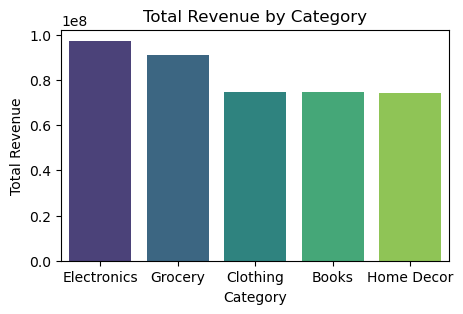

In [77]:
# Aggregate data: group by Category and sum the Revenue
revenue_by_category = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False).round(2)
print("Revenue by Category Data:\n", revenue_by_category)

# Ploting the aggregated data
plt.figure(figsize=(5,3))
# Using seaborn barplot with the aggregated data
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='viridis')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()


Text(0.5, 1.0, ' Most profitable product brand')

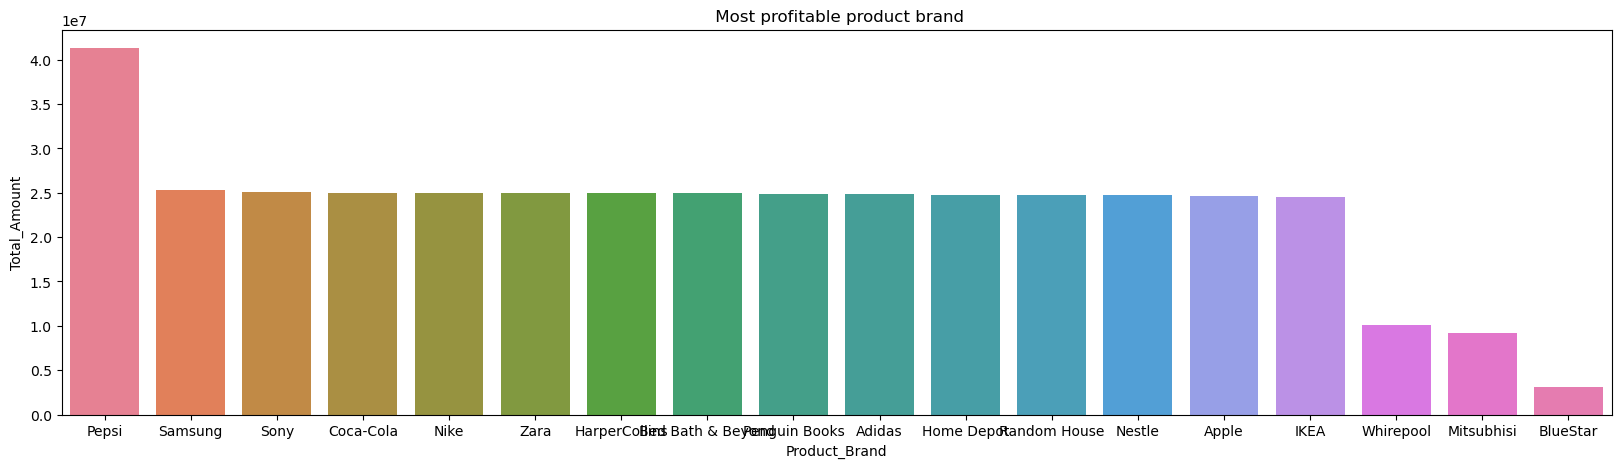

In [83]:
# --------- Most Profitable Brands ----------
brand_sales = df.groupby('Product_Brand')['Total_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize = (20,5))
sns.barplot(brand_sales, palette='husl' )
plt.title(" Most profitable product brand")

#### Product Performance Insights

- Electronics is the most revenue contributing category followed by Grocery. 
- Clothing, books and hime decor are average contributing category.
- Pepsi is the most profitable product brand and BlueStar followed by Whirepool and Mitsubhisi on first, second and third last leat revenue generating product brands.
- Rest of the other brands are nearly same average revenue contribution.

#### Geographical Analysis

Text(0.5, 1.0, 'Country by Revenue')

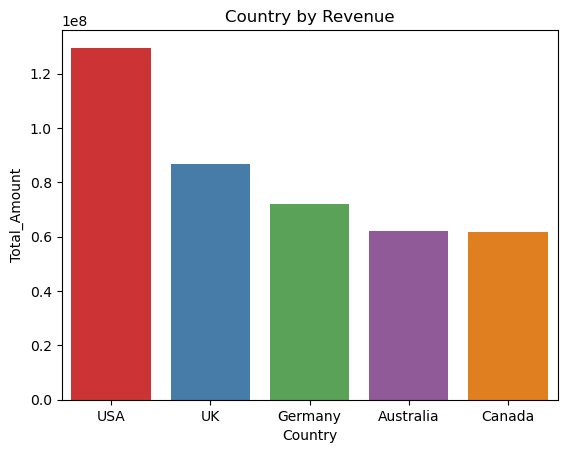

In [81]:
# Sales by Country
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False)

sns.barplot(country_sales, palette= "Set1")
plt.title("Country by Revenue")

Text(0.5, 1.0, 'Top 10 States by revenue')

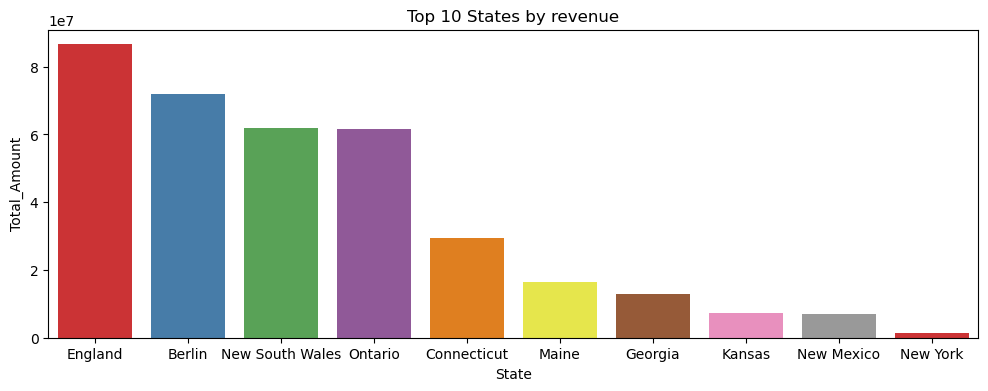

In [79]:
state_sales = df.groupby('State')['Total_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 4))
sns.barplot(state_sales, palette= "Set1")
plt.title("Top 10 States by revenue")

Text(0.5, 1.0, 'Top 10 Cities by revenue')

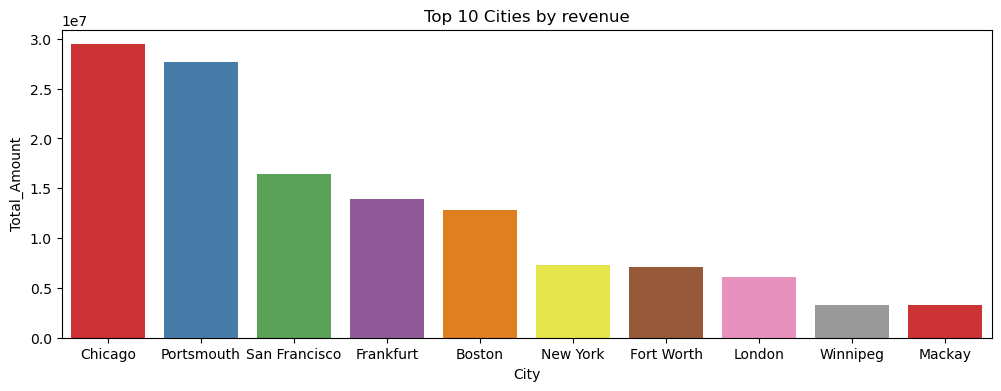

In [85]:
city_sales = df.groupby("City")['Total_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 4))
sns.barplot(city_sales, palette= "Set1")
plt.title("Top 10 Cities by revenue")

#### Geographical Analysis Insights
- The USA is the primary revenue driver, generating significantly more total sales amount than any other country. The UK and Germany follow as the next most crucial international markets, demanding focused marketing investment.
- Sales are highly concentrated in a few specific states/provinces (e.g.,England, Berlin or specific regional hubs).
- Chicago is the hishest revenue contributor followed by Portsmouth city.

#### RFM Segment Overview

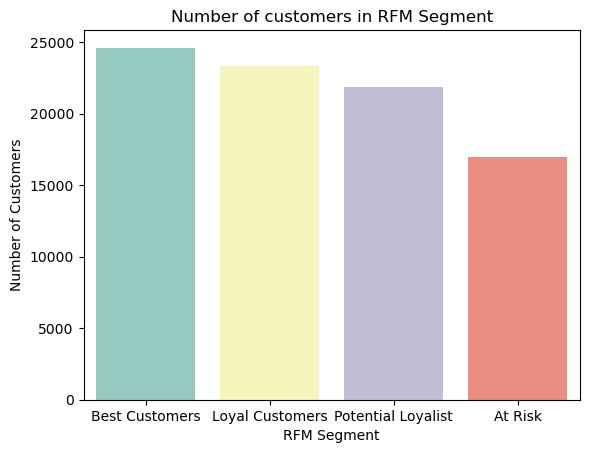

In [87]:
sns.countplot(x = 'RFM_Segment', data = rfm,  order=rfm['RFM_Segment'].value_counts().index, palette='Set3')
plt.title('Number of customers in RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.show()

#### RFM Segment Insights
- Best Customers are the largest group → strong loyal buying behavior.
- Loyal Customers are also high → strong retention.
- Potential Loyalists show good growth opportunity.
- At-Risk customers are the smallest but still significant → need reactivation strategies.

### Recommendation System 

Goal: To enhance customer experience and boost sales by offering personalized product suggestions.

Methodology: It is like Collaborative Filtering, using product matrix and calculayting cosine similarity on the customer-item interaction data.

Output: The system generates a list of personalized product recommendations (Product Category, Brand, Type) for each individual customer.

In [97]:
rdf= df.head(50)

In [99]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

class RecommendationSystem:
    def __init__(self, data):
        """
        Initializes the RecommendationSystem with the provided data.
        
        Parameters:
        - data: A Pandas DataFrame containing customer purchase data.
        """
        self.rdf = data
        self.user_product_matrix = None
        self.similarity_df = None
        self.create_user_product_matrix()
        self.calculate_similarity()

    def create_user_product_matrix(self):
        """Creates a pivot table to represent customer spending across product categories, brands, and types."""
        self.user_product_matrix = pd.pivot_table(
            self.rdf,
            index='Customer_ID',
            columns=['Product_Category', 'Product_Brand', 'Product_Type'],
            values='Total_Amount',
            aggfunc='sum',
            fill_value=0
        )

    def calculate_similarity(self):
        """Calculates cosine similarity between users based on their spending patterns."""
        similarity_matrix = cosine_similarity(self.user_product_matrix)
        self.similarity_df = pd.DataFrame(similarity_matrix, 
                                           index=self.user_product_matrix.index,
                                           columns=self.user_product_matrix.index)

    def recommend_for_all_customers(self):
        """
        Generates automatic product recommendations for all customers based on their similarity to others.
        
        Returns:
        - A dictionary with customer IDs as keys and recommended products as values.
        """
        recommendations = {}
        
        for customer_id in self.user_product_matrix.index:
            col = float(customer_id)
            similar_users = self.similarity_df[col].sort_values(ascending=False).iloc[1:6]
            similar_users_ids = similar_users.index

            # Get recommended products without aggregating amounts
            recommended_products = self.rdf[self.rdf['Customer_ID'].isin(similar_users_ids)]
            
            # Drop duplicates and select relevant columns
            recommended_products = recommended_products[['Product_Category', 'Product_Brand', 'Product_Type']].drop_duplicates()
            
            # Store recommendations for the customer
            recommendations[customer_id] = recommended_products.reset_index(drop=True)
        
        return recommendations
        

In [101]:
 recommender = RecommendationSystem(rdf)

In [108]:
# Get automatic recommendations for all customers
recommendations = recommender.recommend_for_all_customers()
 
# Recommendations for each customer
for customer_id, products in recommendations.items():
        print(f"Recommendations for Customer {customer_id}:")
        print(products)
        print("\n")


Recommendations for Customer 19136.0:
  Product_Category Product_Brand Product_Type
0       Home Decor    Home Depot        Tools
1            Books  Random House   Literature
2      Electronics         Apple       Tablet
3      Electronics       Samsung   Smartphone
4         Clothing          Zara        Shirt


Recommendations for Customer 21399.0:
  Product_Category  Product_Brand Product_Type
0       Home Decor     Home Depot        Tools
1          Grocery         Nestle       Snacks
2            Books   Random House   Literature
3            Books  HarperCollins  Non-Fiction
4         Clothing           Zara        Shirt


Recommendations for Customer 23097.0:
  Product_Category Product_Brand Product_Type
0      Electronics         Apple       Tablet
1       Home Decor    Home Depot        Tools
2          Grocery        Nestle       Snacks
3            Books  Random House   Literature


Recommendations for Customer 23713.0:
  Product_Category Product_Brand Product_Type
0       

### Recommendations

1. Target Under-represented Customer Groups

- Increase marketing towards female customers and the 36–45 age group to balance the customer base.
- Create campaigns tailored for high-income customers, as they are the smallest group.

2. Strengthen Loyalty & Premium Conversion

- Regular and Loyal Customers are high — convert them to Premium using:
tiered loyalty programs like exclusive perks, early access offers, special discounts.

3. Reduce At-Risk Customers

- Run win-back campaigns for “At Risk” customers with personalized discounts and re-engagement emails.
- Improve post-purchase experience to prevent churn.

4. Improve Service Quality

- Address issues leading to 2-star ratings and Average/Bad feedback.
- Enhance customer support, product quality checks, and delivery accuracy.

5. Enhance Payment Experience

- Credit Card is top choice → offer card-based promotions & EMI options.
- Promote PayPal / UPI to diversify payment mode adoption.

6. Optimize Order Processing

- Reduce Pending and Processing orders using better inventory management and faster logistics.
- Ensure smooth tracking and timely updates to customers.

7. Leverage Core Customer Base

- Majority customers are medium-income young adults (19–35) → focus on value-for-money products, combos, and targeted social media campaigns.

8. Maintain Sales Consistency & Investigate Drop

- Sales remain consistent across months → maintain ongoing marketing cycles.

9. Grow Potential Loyalists

- Convert “Potential Loyalists” into “Loyal Customers” with personalized recommendations and repeat-purchase rewards.

10. Increase Female Customer Engagement

- Launch women-focused campaigns (beauty, fashion, lifestyle, home décor depending on your product line).
- Run targeted ads on platforms where female audiences are more active (Instagram, Pinterest, YouTube).